<a href="https://colab.research.google.com/github/anupbenny/nodeproject/blob/master/Intro_PyTo_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello Anup")

Hello Anup


`!pip list ` to see what is available

In [ ]:
import torch

In [ ]:
x = torch.arange(1,11)
x

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
x.reshape(2,5
        )

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])

In [ ]:
x.reshape(-1,2)

tensor([[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [ 9, 10]])

In [ ]:
x.reshape(2,-1)

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])

In [ ]:
x.shape

torch.Size([10])

In [ ]:
x.size()

torch.Size([10])

In [ ]:
y = torch.rand(10)

In [ ]:
y

tensor([0.5575, 0.1826, 0.6048, 0.4217, 0.1637, 0.5187, 0.8975, 0.3359, 0.0440,
        0.1383])

In [ ]:
x+y

tensor([ 1.5575,  2.1826,  3.6048,  4.4217,  5.1637,  6.5187,  7.8975,  8.3359,
         9.0440, 10.1383])

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(in_features=h1, out_features=h2)
    self.out = nn.Linear(in_features=h2, out_features=out_features)

  def forward(self, model):
    model = F.relu(self.fc1(model))
    model = F.relu(self.fc2(model))
    model = self.out(model)

    return model


In [12]:
MANUEL_SEED = 42
torch.manual_seed(MANUEL_SEED)

model = Model()

In [16]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
my_data = pd.read_csv(url)

my_data.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [18]:
my_data['variety'] = my_data['variety'].replace('Setosa', 0.0)
my_data['variety'] = my_data['variety'].replace('Versicolor', 1.0)
my_data['variety'] = my_data['variety'].replace('Virginica', 2.0)
my_data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [23]:
X = my_data.drop('variety', axis=1).values
y = my_data['variety'].values

In [25]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=MANUEL_SEED, shuffle=True)

In [50]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [51]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [57]:
losses = []
epochs = 100
for epoch in range(epochs):
  # forward pass
  y_pred = model.forward(X_train)
  # calculate the loss
  loss = loss_fn(y_pred, y_train)
  # keep track of losses
  losses.append(loss.detach().numpy())

  if epoch % 10 == 0:
    print(f"Epoch:  {epoch} Loss: {loss}")

  # zero grad to prevent weight accumulation
  optimizer.zero_grad()
  # reduce gradient / back propagation
  loss.backward()
  # optimizer step
  optimizer.step()


Epoch:  0 Loss: 0.04789155349135399
Epoch:  10 Loss: 0.04783383756875992
Epoch:  20 Loss: 0.04777742922306061
Epoch:  30 Loss: 0.04772241413593292
Epoch:  40 Loss: 0.04766879975795746
Epoch:  50 Loss: 0.04761657491326332
Epoch:  60 Loss: 0.04756591096520424
Epoch:  70 Loss: 0.047516778111457825
Epoch:  80 Loss: 0.04746903106570244
Epoch:  90 Loss: 0.047422945499420166


Text(0.5, 0, 'Epoch')

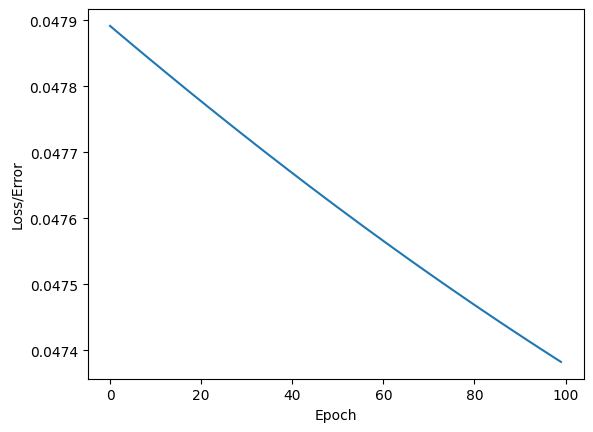

In [58]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss/Error")
plt.xlabel("Epoch")

In [61]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = loss_fn(y_eval, y_test)

loss

tensor(0.0215)

In [72]:
correct = 0

with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    if y_val.argmax().item() == y_test[i].item():
      correct += 1
    print(f"{y_val}, \t Actual: {y_test[i].item()}, Pediction: {y_val.argmax().item()}");

  print(f"We got {correct}/{len(X_test)} correct!")

tensor([-17.0269,   9.7501,   1.8977]), 	 Actual: 1, Pediction: 1
tensor([ 21.7888,   5.3615, -11.5438]), 	 Actual: 0, Pediction: 0
tensor([-58.2432,  -0.2475,  21.6039]), 	 Actual: 2, Pediction: 2
tensor([-19.2353,   8.6669,   3.1816]), 	 Actual: 1, Pediction: 1
tensor([-21.0193,   9.5062,   3.5017]), 	 Actual: 1, Pediction: 1
tensor([ 20.2244,   5.0875, -10.7935]), 	 Actual: 0, Pediction: 0
tensor([-8.4698,  9.2690, -1.2010]), 	 Actual: 1, Pediction: 1
tensor([-36.6716,   4.5639,  11.4632]), 	 Actual: 2, Pediction: 2
tensor([-24.0722,   7.0039,   5.6978]), 	 Actual: 1, Pediction: 1
tensor([-10.5667,   9.7721,  -0.5895]), 	 Actual: 1, Pediction: 1
tensor([-31.2297,   5.9073,   8.8533]), 	 Actual: 2, Pediction: 2
tensor([ 20.7561,   4.4774, -10.7299]), 	 Actual: 0, Pediction: 0
tensor([ 22.7897,   4.9231, -11.7459]), 	 Actual: 0, Pediction: 0
tensor([ 21.1207,   4.5573, -10.9121]), 	 Actual: 0, Pediction: 0
tensor([ 22.1218,   4.7768, -11.4122]), 	 Actual: 0, Pediction: 0
tensor([-19.9